# Building 3D Simulation Functions

In [4]:
import sys
sys.path.append('/home/jhrag/Code/')

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from NI_simulation.modules import ni_sim3D

In [23]:
source_distribution = ni_sim3D.source_distribution()
sources = source_distribution.surface_line(npts=1000)

test


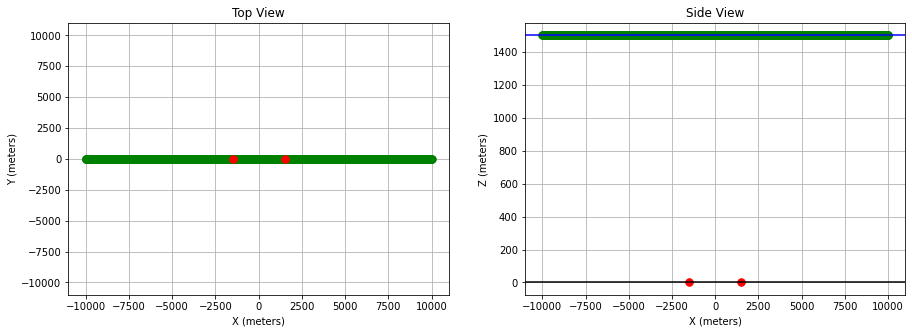

In [27]:
env = ni_sim3D.environment(sources, time_length=5*3600)

env.plot_env( xlim=(-11000,11000), ylim=(-11000,11000), type='both')

In [28]:
xA, xB = env.get_signals()

array([ 7.70988212e-24,  7.70988212e-23, -5.39691748e-23, ...,
       -3.08395285e-23,  0.00000000e+00,  3.08395285e-23])

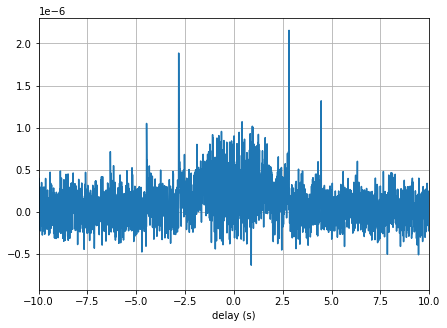

In [29]:
env.correlate(plot=True)

## Create Animation With Single Sources

In [30]:
# create x points to simuled
xs = list(np.linspace(-10000, 10000, 500))

In [31]:
for k, x in enumerate(tqdm(xs)):
    source_distribution = ni_sim3D.source_distribution()
    sources = source_distribution.surface_line(xmin = (x-1000), xmax=(x+1000), npts=160)

    env = ni_sim3D.environment(sources, time_length=600)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    env.plot_env(xlim=(-11000,11000), type='side', ax=ax1)
    
    env.get_signals()
    env.correlate(plot=True, ax=ax2)

    fig.savefig(f'animation_figures/{k:04}.png', dpi=400)
    plt.close()

print('Writing animation to file...')
im_name = 'line_segment_sweep_wider.mp4'
os.system(f'ffmpeg -r 40 -f image2 -s 1920x1080 -i animation_figures/%04d.png -vcodec libx264 -crf 15 -pix_fmt yuv420p {im_name}')



100%|██████████| 500/500 [54:26<00:00,  6.53s/it]
Writing animation to file...


256

In [34]:
im_name = 'line_segment_sweep_wider.mp4'
os.system(f'ffmpeg -r 40 -f image2 -s 1920x1080 -i animation_figures/%04d.png -vcodec libx264 -crf 15 -pix_fmt yuv420p {im_name}')

0